In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from datetime import datetime
from datetime import timedelta


In [2]:
disney_full = pd.read_csv('DIS.csv')

In [3]:
disney_full.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1985-01-02,1.233125,1.238263,1.233125,1.235694,0.873995,1707856
1,1985-01-03,1.233125,1.233125,1.222849,1.225418,0.866726,11901470
2,1985-01-04,1.222849,1.222849,1.217711,1.220280,0.863092,3323264
3,1985-01-07,1.225418,1.243401,1.225418,1.235694,0.873995,3381652
4,1985-01-08,1.235694,1.245970,1.230556,1.243401,0.879445,2997263


In [4]:
disney = disney_full[['Date', 'Open']]
disney.Date = pd.to_datetime(disney.Date)
disney['Year'] = pd.DatetimeIndex(disney['Date']).year
disney.head()

c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


,Date,Open,Year
0,1985-01-02,1.233125,1985
1,1985-01-03,1.233125,1985
2,1985-01-04,1.222849,1985
3,1985-01-07,1.225418,1985
4,1985-01-08,1.235694,1985


## Ежедневные данные

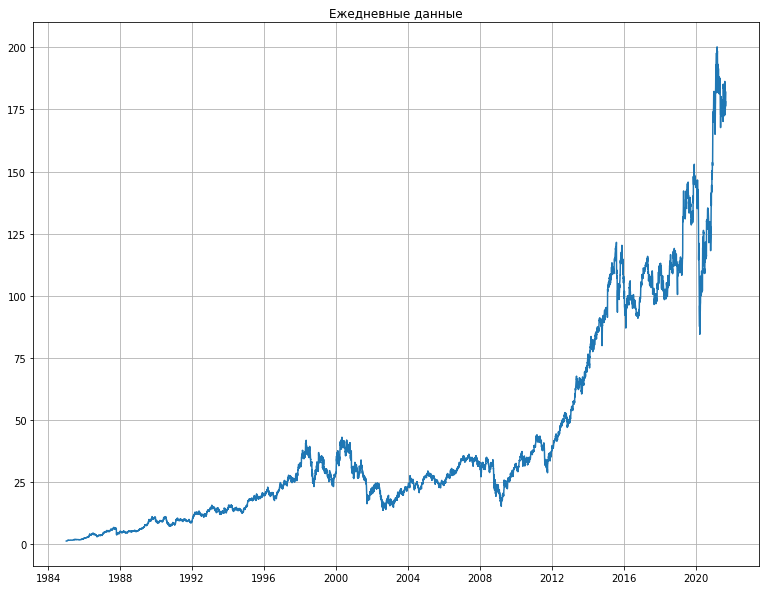

In [5]:
plt.figure(figsize=(13, 10))
plt.plot(disney.Date, disney.Open)
plt.title('Ежедневные данные')
plt.grid();

In [6]:
#disney['Year'] = pd.DatetimeIndex(disney['Date']).year
disney_by_year = disney.groupby('Year', as_index=False).agg({'Open': 'mean'})
#disney_by_year.Year = pd.to_datetime(disney_by_year.Year, format="%Y")
disney_by_year.head()

,Year,Open
0,1985,1.747406
1,1986,3.435224
2,1987,5.245696
3,1988,5.054553
4,1989,8.205949


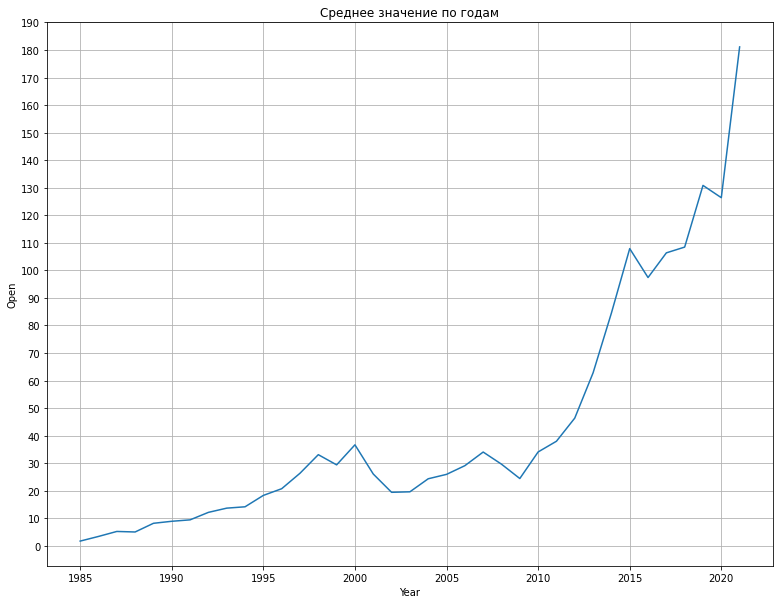

In [7]:
plt.figure(figsize=(13, 10))
sns.lineplot(x=disney_by_year.Year, y=disney_by_year.Open)
plt.grid()
plt.title('Среднее значение по годам')
plt.yticks(np.arange(0, max(disney_by_year.Open) + 10, 10));

## Полулогарифмический график

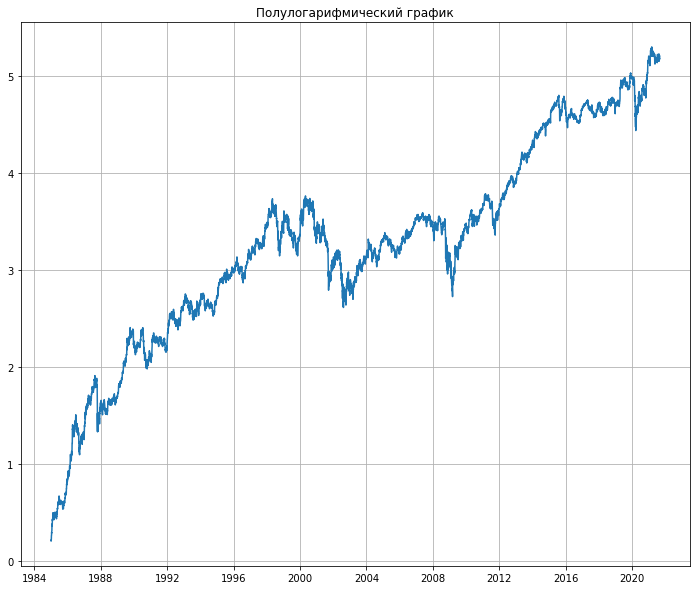

In [8]:
plt.figure(figsize=(12, 10))
plt.semilogy(disney.Date, disney.Open, base=np.exp(1))
plt.title('Полулогарифмический график')
plt.grid()

labels = np.arange(6)
points = np.exp(labels)
plt.yticks(points, labels);

## График 1/y

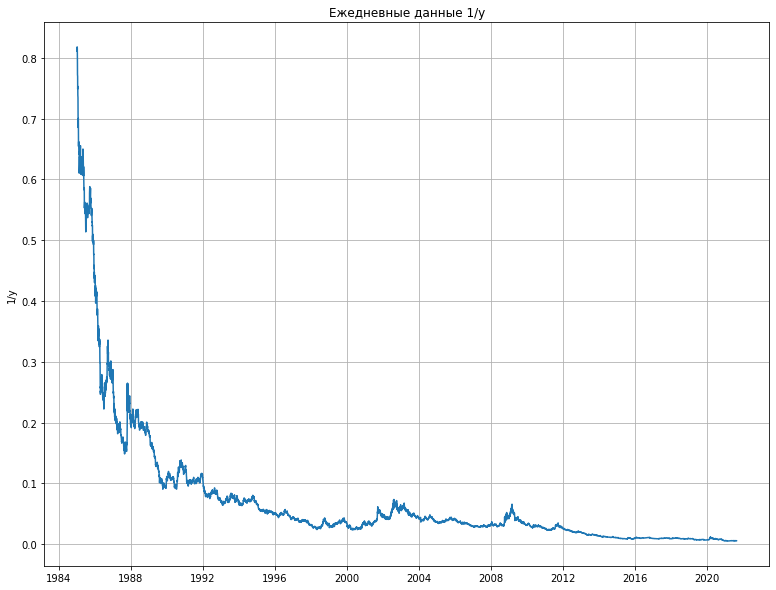

In [9]:
plt.figure(figsize=(13, 10))
plt.plot(disney.Date, 1 / disney.Open)
plt.title('Ежедневные данные 1/y')
plt.ylabel('1/y')
plt.grid();

## Участки завершения интенсивного роста (1/y)

In [10]:
def revers_segment(x1, x2, y2, y1=0): # x в формате '2020-01-01'
    plt.figure(figsize=(13, 10))
    plt.plot(disney.Date, 1 / disney.Open)
    plt.title('Ежедневные данные 1/y')
    plt.grid()
    lim = (datetime.strptime(x1, "%Y-%m-%d"), 
           datetime.strptime(x2, "%Y-%m-%d"))
    plt.xlim(lim)
    plt.ylim(y1, y2);

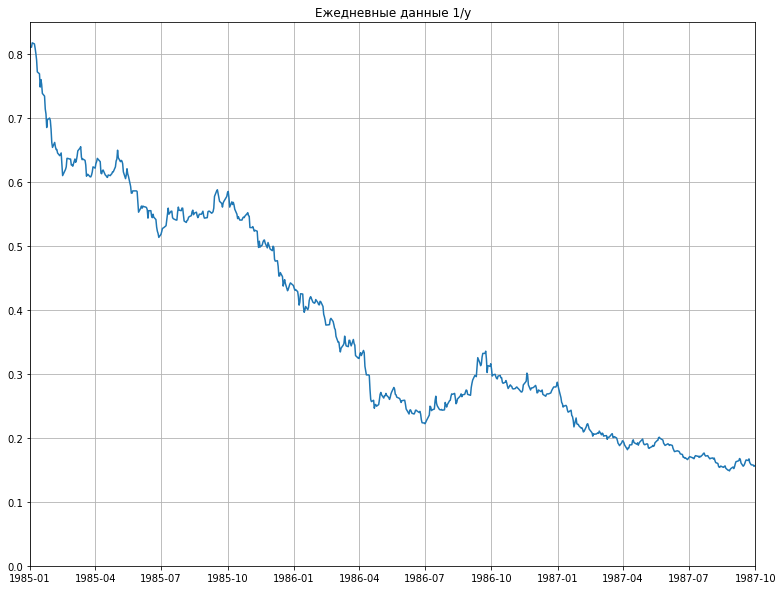

In [11]:
revers_segment(x1='1985-01-01', x2='1987-10-01', y2=0.85)

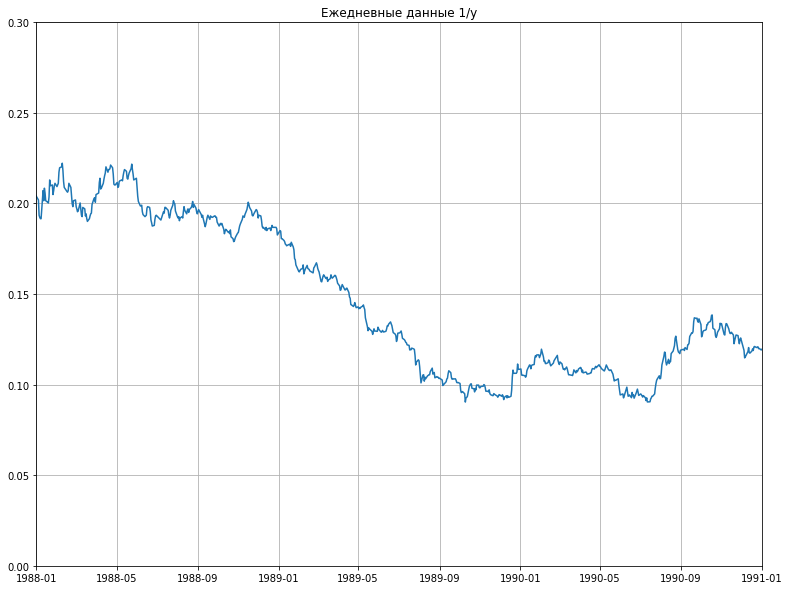

In [12]:
revers_segment(x1='1988-01-01', x2='1991-01-01', y2=0.3)

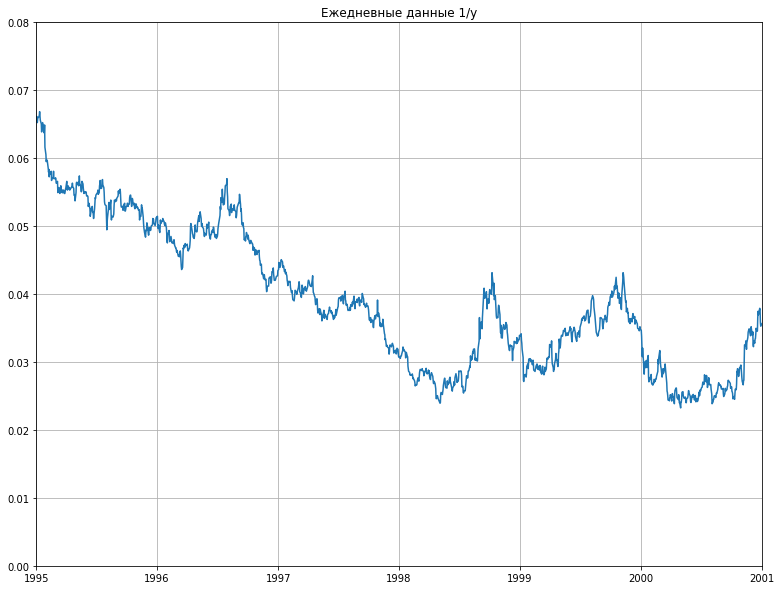

In [13]:
revers_segment(x1='1995-01-01', x2='2001-01-01', y2=0.08)

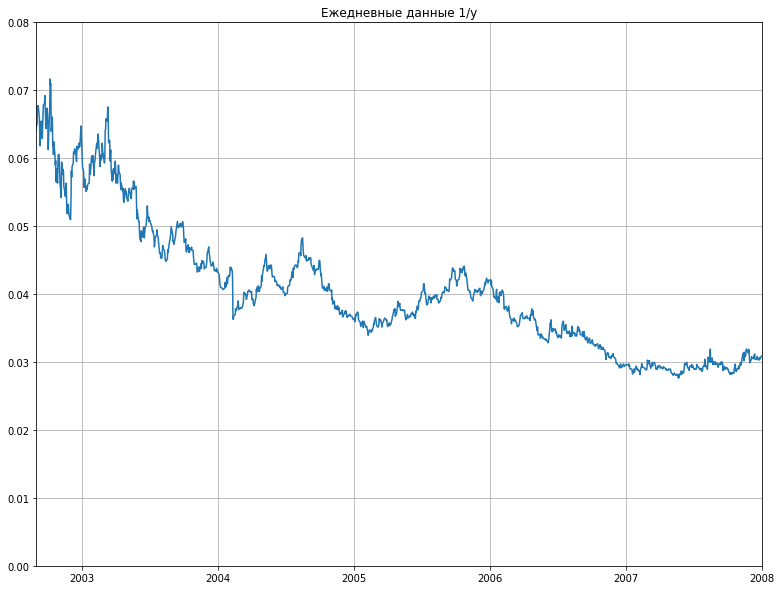

In [14]:
revers_segment(x1='2002-09-01', x2='2008-01-01', y2=0.08)

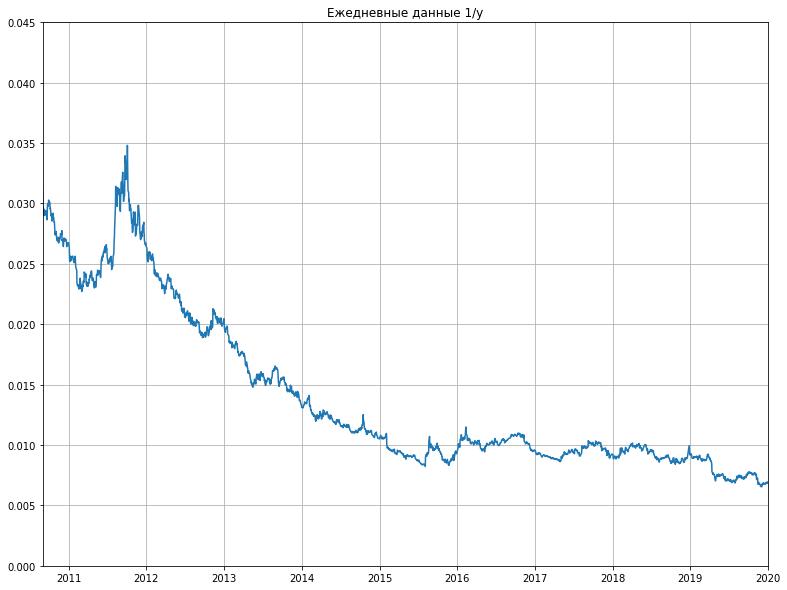

In [15]:
revers_segment(x1='2010-09-01', x2='2020-01-01', y2=0.045)

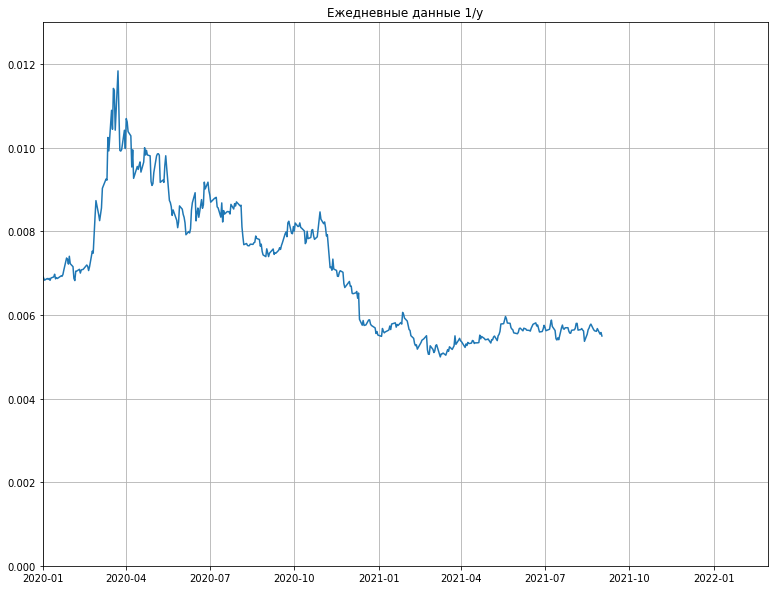

In [16]:
revers_segment(x1='2020-01-01', x2='2022-03-01', y2=0.013)

## Поиск конца интенсивного роста на участках

In [76]:
disney['t'] = np.arange(1, disney.shape[0] + 1);

c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [77]:
def segment_semilog(t0, t1, y2, y1=0): # t0 и t1 в формате '2020-01-01'
    y0 = disney.query('Date == @t0').Open.values
    print('y0 = ', y0)

    t0 = disney.query('Date == @t0').t.values
    print('t0 = ', t0)
    t1 = disney.query('Date == @t1').t.values
    
    plt.figure(figsize=(12, 10))
    plt.plot((disney.t - t0) ** 2, np.log(disney.Open / y0))
    plt.grid()
    plt.ylabel('ln(y / y0)')
    plt.xlabel('(t - t0)^2')
    plt.xlim(0, (t1 - t0)** 2 + 10000 * y0)
    plt.vlines((t1 - t0)** 2, -1, 5, color = 'r', linestyle='--')
    plt.ylim(y1, y2);

y0 =  [1.71353]
t0 =  [189]


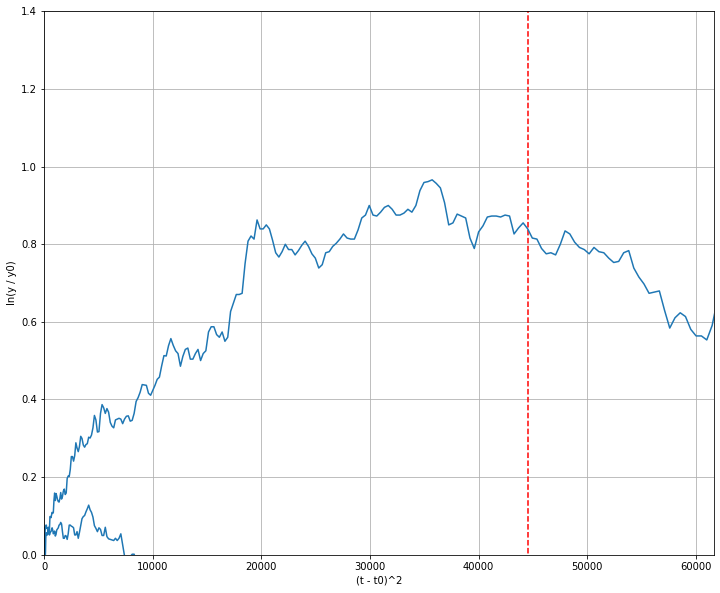

In [78]:
segment_semilog(t0='1985-10-01', t1='1986-08-01', y2=1.4)

1986: ln(y/y0) = 1.17

y0 =  [5.436026]
t0 =  [970]


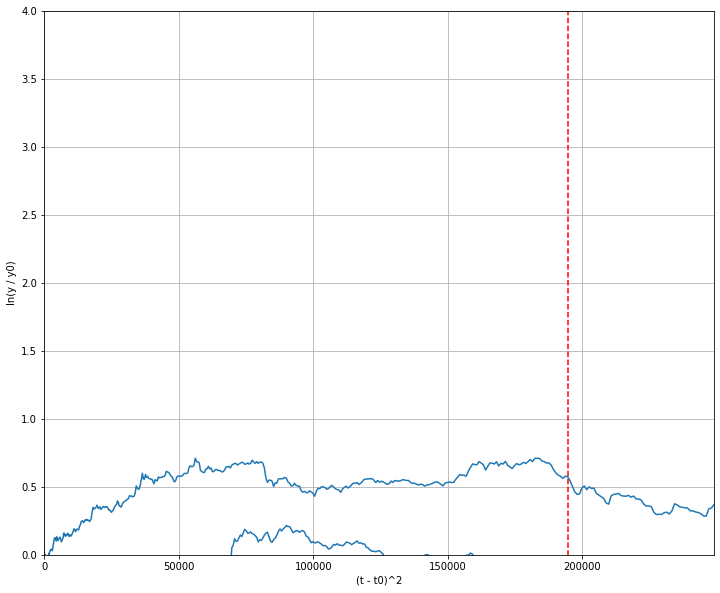

In [79]:
segment_semilog(t0='1988-11-01', t1='1990-08-01', y2=4)

1990: ln(y/y0) = 2.5

y0 =  [19.976625]
t0 =  [2887]


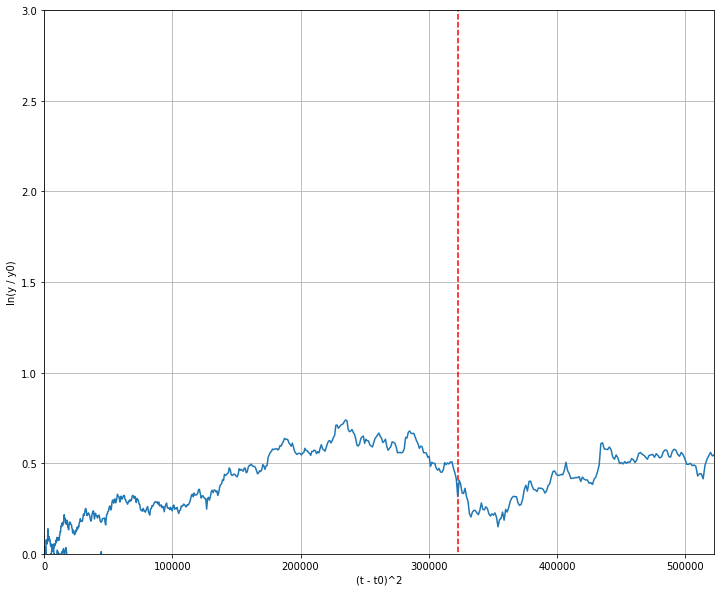

In [80]:
segment_semilog(t0='1996-06-03', t1='1998-09-01', y2=3)

1998: ln(y/y0) = 

y0 =  [17.421591]
t0 =  [4565]


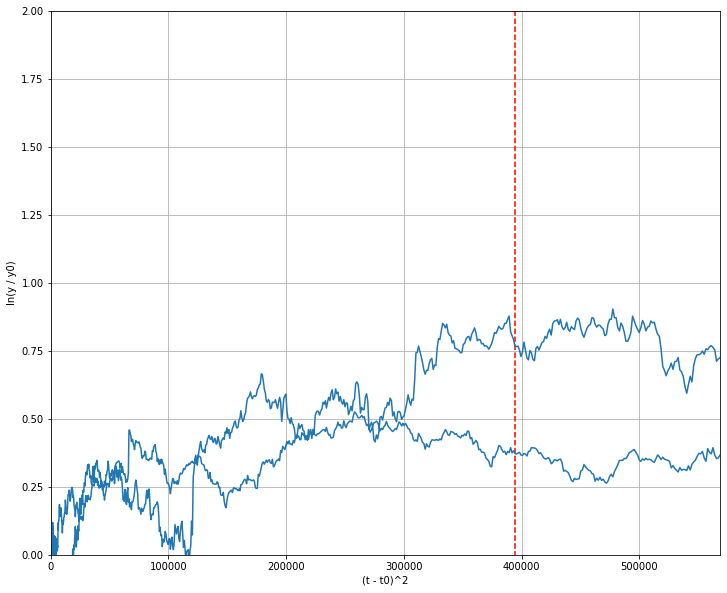

In [81]:
segment_semilog(t0='2003-02-03', t1='2005-08-01', y2=2)

2005: ln(y/y0) = 

Text(0.5, 0, 'Date')

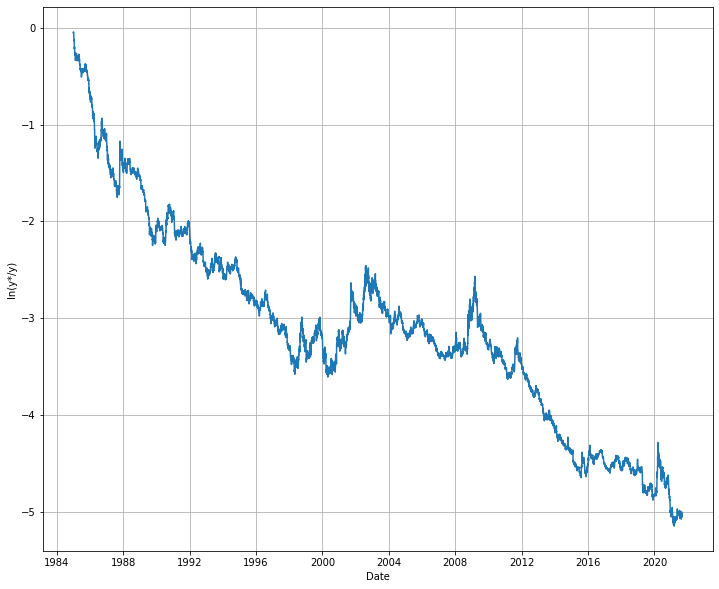

In [82]:
y1 = 1.17
t1 = '1986-08-01'
t1 = datetime.strptime(t1, "%Y-%m-%d")
plt.figure(figsize=(12, 10))
plt.plot(disney.Date, np.log(y1 / disney.Open))
plt.grid()
plt.ylabel('ln(y*/y)')
plt.xlabel('Date')
#plt.vlines(t1, -5, 3, color = 'r', linestyle='--')
#plt.xlim(disney.Date.min(), t1 + 5 * timedelta(days=365))
#plt.ylim(-3, 1);

Text(0.5, 0, 'ln y')

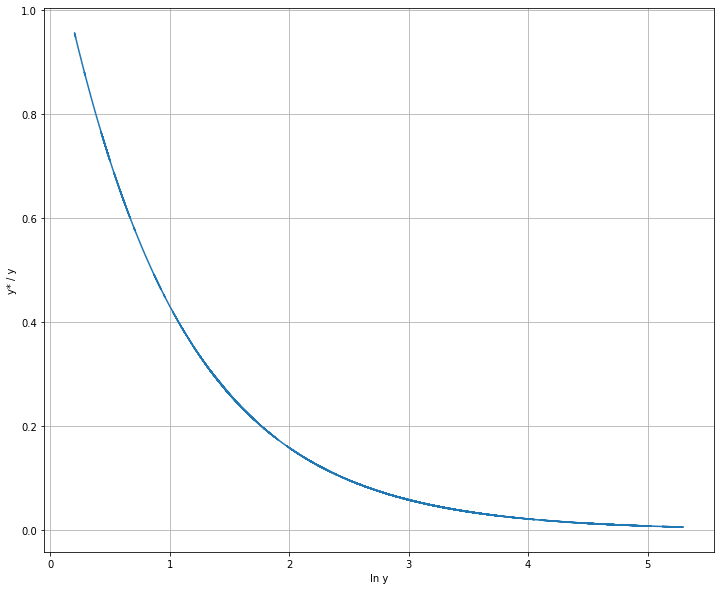

In [83]:
y1 = 1.17
t1 = '1986-08-01'
t1 = datetime.strptime(t1, "%Y-%m-%d")
plt.figure(figsize=(12, 10))
plt.plot(np.log(disney.Open), y1 / disney.Open)
plt.grid()
plt.ylabel('y* / y')
plt.xlabel('ln y')

c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


(5480.0, 7151.0)

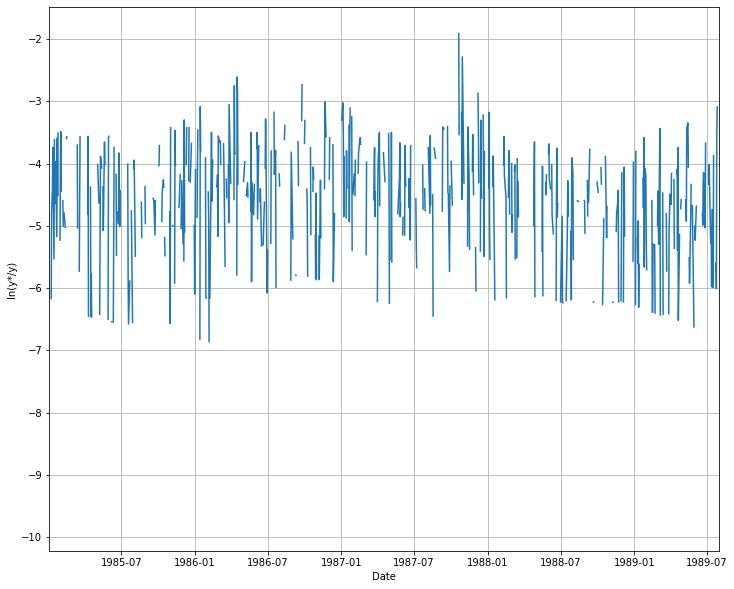

In [84]:
y_diff = np.diff(disney.Open) / np.diff(disney.t[0:])
t1 = '1986-08-01'
t1 = datetime.strptime(t1, "%Y-%m-%d")
plt.figure(figsize=(12, 10))

plt.plot(disney.Date[1:], np.log(y_diff / disney.Open[1:]))
plt.grid()
plt.ylabel('ln(y*/y)')
plt.xlabel('Date');
#plt.vlines(t1, -5, 3, color = 'r', linestyle='--')
plt.xlim(disney.Date.min(), t1 + 3 * timedelta(days=365))
#plt.ylim(-3, 1);

In [85]:
y_diff.size

9242

In [86]:
disney.Open.size

9243

In [87]:
disney.t.size

9243